Not getting Me for LT2p. Analyze where the T is going.
Claim that Tp/T relates to Yp/Y.
Analyze states of T: by p, by Me, by L. Show evolution of fractions over time.

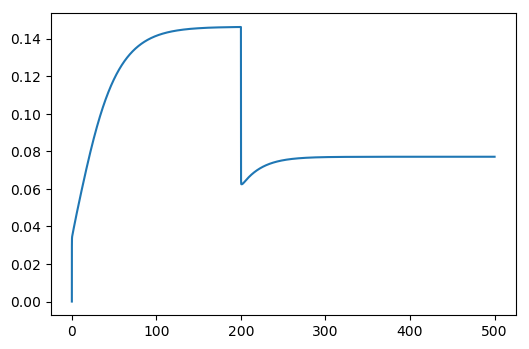

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from chemotaxis_model import ChemotaxisModel

model = ChemotaxisModel()
model.appendToModel('''at (time > 200): L = 0.11e-3''')
#model.appendToModel('''at (time > 100): k0 = 0.088e-6''')
#model.appendToModel('''at (time > 200): k0 = 0, L=3e-6''')

rr = model.startRoadRunner()


#rr.timeCourseSelections = ['time', 'T2R', 'LT2', 'LT2p', 'Yp', 'T3R']

#rr.timeCourseSelections = ['time', 'T2', 'T3', 'LT2', 'LT3', 'LT3p']
Tp_ids = ['T2p', 'T3p', 'T4p', 'LT2p', 'LT3p', 'LT4p']
T_ids = ['T2', 'T3', 'T4', 'LT2', 'LT3', 'LT4']
T_ids.extend(Tp_ids)
time_course_selection = ['time', 'Yp', 'Y']
time_course_selection.extend(T_ids)
rr.timeCourseSelections = time_course_selection
end_time = 500
result = rr.simulate(0, end_time, 20*end_time)
Tp = sum([result[id] for id in Tp_ids])
T = sum([result[id] for id in T_ids])
frc_Yp = result['Yp']/(result['Y']+result['Yp'])
plt.plot(result['time'], Tp/T)
#rr.plot(result, xlim=[0, end_time])

In [58]:
type(result)

NamedArray

Expected to see an impulse response in response to the step input. But see a step response in Yp.

In [ ]:
Ids = ['J11', 'J12', 'J3']
{id: model.getReactionRateForId(id) for id in Ids}

In [ ]:
model = '''model reset()

    S1 -> S2; k1*S1

    E1: at (S2>9): S2=0, S1=10

    S1 = 10
    S2 = 0
    k1 = 0.5
  end
'''